#**Parameter Analysis for the ARIMA model**

## Import the library


In [18]:
# Import the library
from pmdarima import auto_arima
import pandas as pd


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Read dataset

In [19]:
df = pd.read_csv('airline-passengers.csv')

In [20]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Fit auto_arima function to AirPassengers dataset


In [21]:
stepwise_fit = auto_arima(df['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.97 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.23 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.15 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.25 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.36 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.09 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.75 sec
 ARIMA(0,1,1)(1,1,1)[12]     

## To print the summary


In [22]:
stepwise_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 21 Aug 2024   AIC                           1019.178
Time:                                     12:06:23   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [23]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing

## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Passengers'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.012
Date:                            Wed, 21 Aug 2024   AIC                            896.025
Time:                                    12:06:25   BIC                            909.920
Sample:                                         0   HQIC                           901.667
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2984      0.077     -3.873      0.000      -0.449      -0.147
ar.S.L12       0.7098      0.220      3.232      0.001       0.279       1.140
ar.S.L24       0.2895      0.101      2.879      0.004       0.092       0.487
ma.S.L12      -0.9813      2.135     -0.460      0.646      -5.166       3.203
sigma2        88.1658    170.289      0.518      0.605    -245.595     421.927
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [25]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

## plot predictions and actual values



<Axes: >

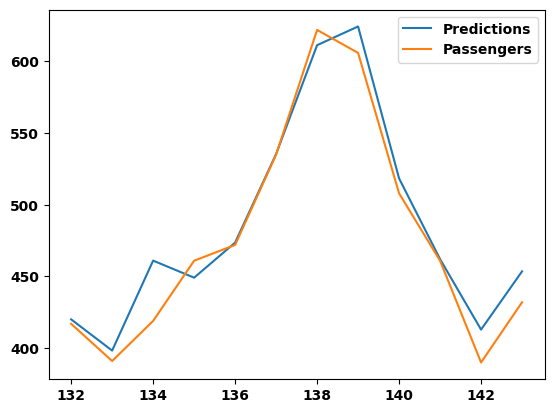

In [26]:
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)

## Evaluate the model using MSE and RMSE

In [27]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Passengers"], predictions)

# Calculate mean squared error
mean_squared_error(test["Passengers"], predictions)

293.977047063233

#**Well Done :)**